In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# DATA IMPORT

In [2]:
data=pd.read_csv("D:/Python Datasets/New York City Airbnb Open Data/AB_NYC_2019.csv")

In [3]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
data.describe

<bound method NDFrame.describe of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

     

In [5]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
data.shape

(48895, 16)

# Data Cleaning(missing values & 0's)

In [8]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
data2=data.dropna(subset=['name','host_name'])

In [10]:
data2.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
data2.shape

(48858, 16)

In [12]:
data2=data2[(data2.price!= 0) & (data2.minimum_nights!= 0) & (data2.number_of_reviews!= 0)]
data2.reset_index(drop=True, inplace=True)

In [13]:
mean_availability_365 = data2['availability_365'].mean(skipna=True)
data2=data2.replace(0,mean_availability_365)

In [14]:
data2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365.000000
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355.000000
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194.000000
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,114.881631
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38806,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147.000000
38807,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339.000000
38808,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87.000000
38809,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40.000000


# Changing Data Type

In [15]:
data2['availability_365']=data2['availability_365'].astype('int')

In [16]:
data2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,114
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38806,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
38807,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
38808,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
38809,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [17]:
data2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,114
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38806,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
38807,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
38808,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
38809,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


# Deleting unneccesary columns

In [18]:
data3=data2
del data3['name']
del data3['host_name']

In [19]:
data3

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,114
4,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38806,36425863,83554966,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
38807,36427429,257683179,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
38808,36438336,211644523,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
38809,36442252,273841667,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


# Exploratory Data Analysis

## Class distribution check

In [20]:
data3['neighbourhood_group'].value_counts(normalize=True)

Manhattan        0.428255
Brooklyn         0.423334
Queens           0.117802
Bronx            0.022519
Staten Island    0.008090
Name: neighbourhood_group, dtype: float64

In [21]:
data3['room_type'].value_counts(normalize=True)

Entire home/apt    0.523563
Private room       0.454691
Shared room        0.021746
Name: room_type, dtype: float64

In [22]:
data3['price'].describe()

count    38811.000000
mean       142.369199
std        197.006883
min         10.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

## Univariant analysis

In [23]:
data3.shape

(38811, 14)

In [24]:
data3['minimum_nights'].describe()

count    38811.000000
mean         5.868723
std         17.390315
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1250.000000
Name: minimum_nights, dtype: float64

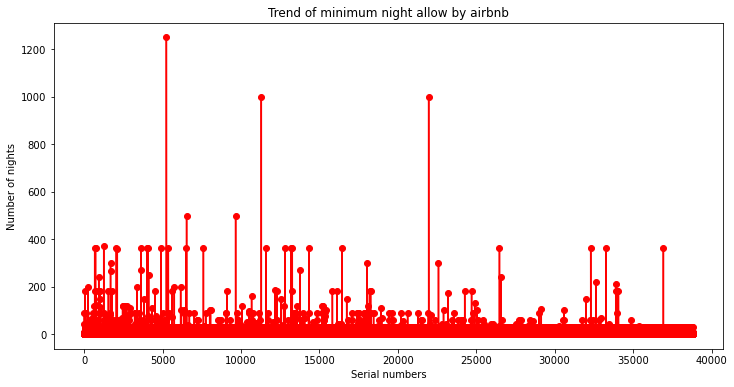

In [25]:
plt.figure(figsize=(12,6))
plt.plot(data3.index,data3['minimum_nights'],'ro-')
plt.title("Trend of minimum night allow by airbnb")
plt.xlabel("Serial numbers")
plt.ylabel("Number of nights")
plt.show()

<AxesSubplot:xlabel='minimum_nights'>

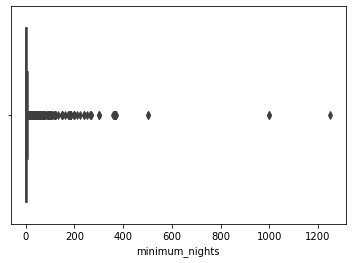

In [26]:
sns.boxplot(x='minimum_nights',data=data3)

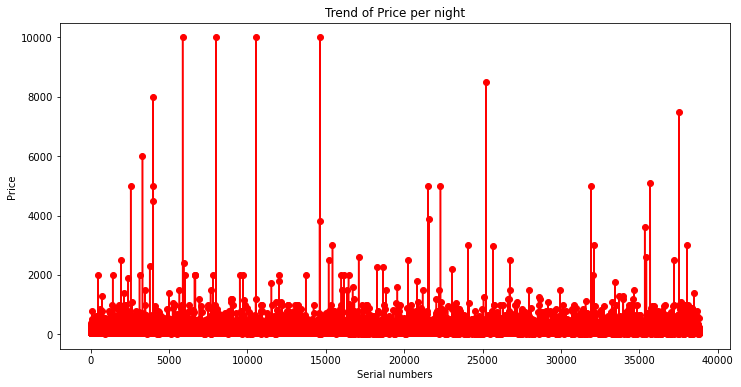

In [27]:
plt.figure(figsize=(12,6))
plt.plot(data3.index,data3['price'],'ro-')
plt.title("Trend of Price per night")
plt.xlabel("Serial numbers")
plt.ylabel("Price")
plt.show()

<AxesSubplot:xlabel='price'>

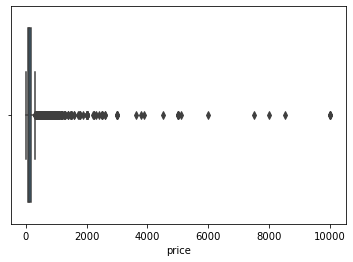

In [28]:
sns.boxplot(x='price',data=data3)

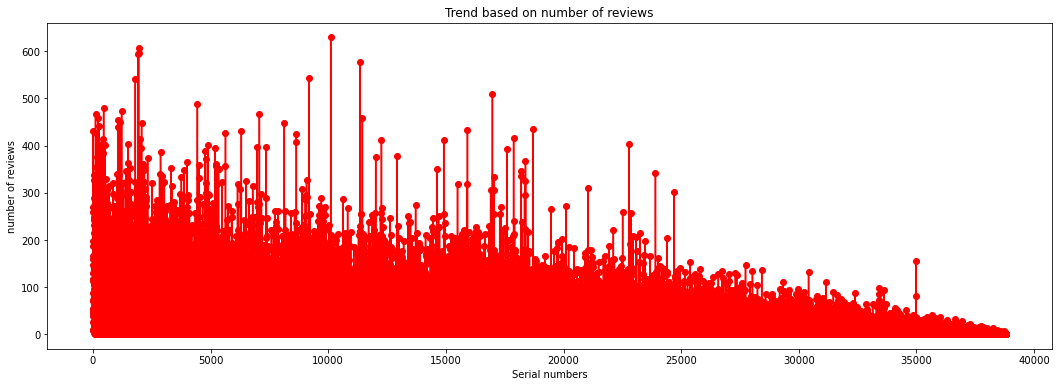

<AxesSubplot:xlabel='number_of_reviews'>

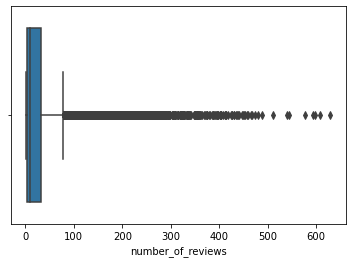

In [29]:
plt.figure(figsize=(18,6))
plt.plot(data3.index,data3['number_of_reviews'],'ro-')
plt.title("Trend based on number of reviews")
plt.xlabel("Serial numbers")
plt.ylabel("number of reviews")
plt.show()
sns.boxplot(x='number_of_reviews',data=data3)

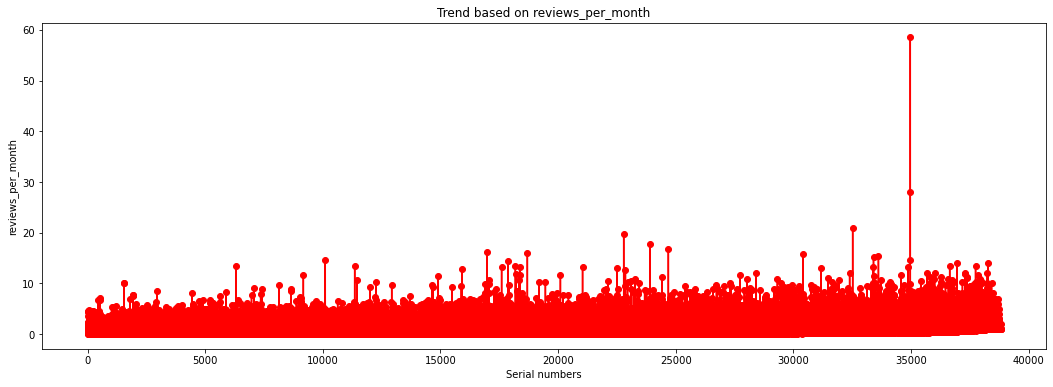

<AxesSubplot:xlabel='reviews_per_month'>

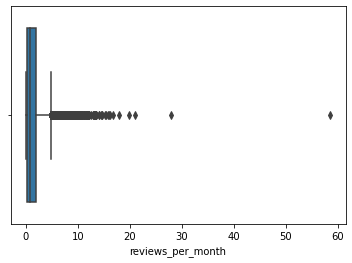

In [30]:
plt.figure(figsize=(18,6))
plt.plot(data3.index,data3['reviews_per_month'],'ro-')
plt.title("Trend based on reviews_per_month")
plt.xlabel("Serial numbers")
plt.ylabel("reviews_per_month")
plt.show()
sns.boxplot(x='reviews_per_month',data=data3)

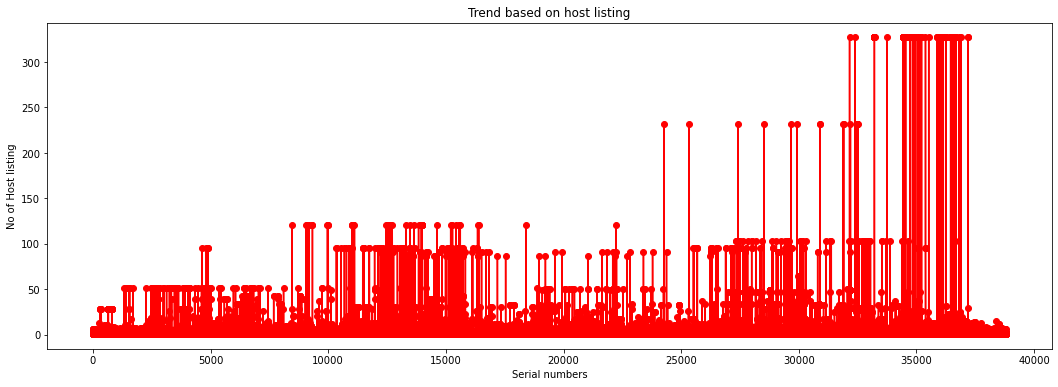

<AxesSubplot:xlabel='calculated_host_listings_count'>

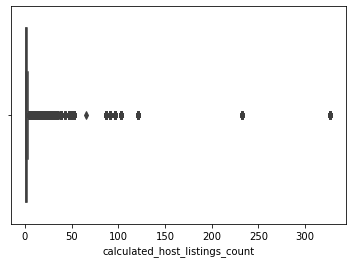

In [31]:
plt.figure(figsize=(18,6))
plt.plot(data3.index,data3['calculated_host_listings_count'],'ro-')
plt.title("Trend based on host listing")
plt.xlabel("Serial numbers")
plt.ylabel("No of Host listing")
plt.show()
sns.boxplot(x='calculated_host_listings_count',data=data3)

#### All graphs are right skewed

## Bi-variant analysis

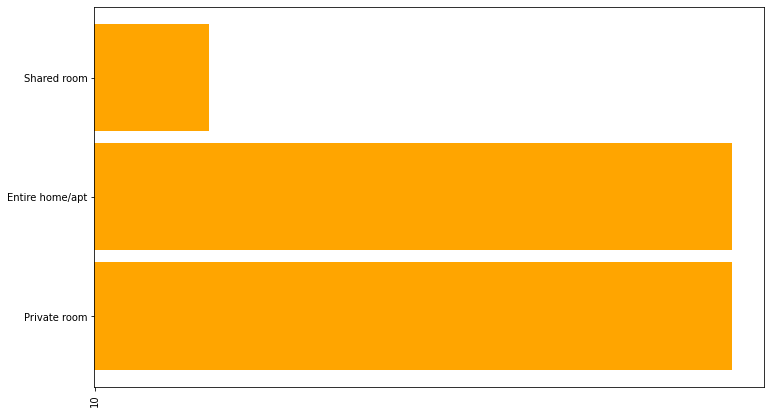

In [40]:
plt.figure(figsize=(12,7))
plt.barh(data3.room_type,data3.price,height=0.9,color="orange") #height arguement to set the height of bar
plt.xticks(np.arange(data3.price.min(),data3.price.max(),10000),rotation="90")
plt.show()

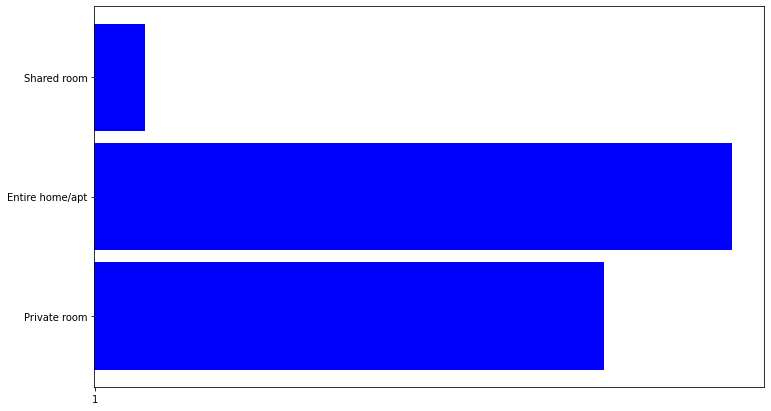

In [45]:
plt.figure(figsize=(12,7))
plt.barh(data3.room_type,data3.minimum_nights,height=0.9,color="blue") #height arguement to set the height of bar
plt.xticks(np.arange(data3.minimum_nights.min(),data3.price.max(),10000),rotation="0")
plt.show()

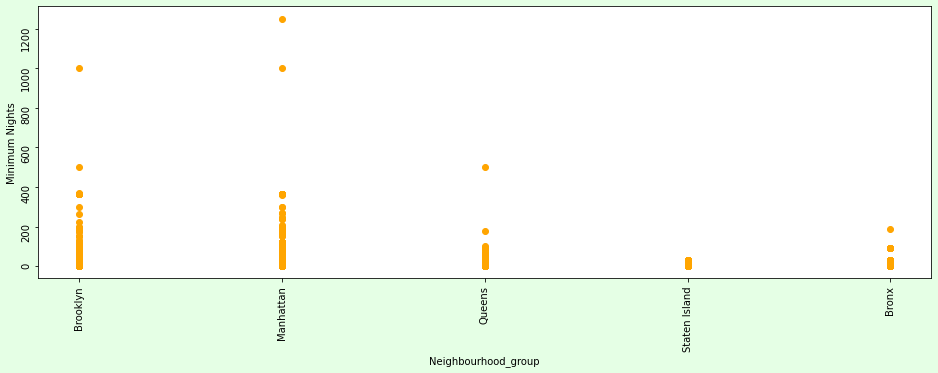

In [47]:
plt.figure(figsize=(16,5), facecolor=(0, 1, 0, .1))
plt.scatter(data3.neighbourhood_group,data3['minimum_nights'],color="orange",marker = "o")
plt.xlabel("Neighbourhood_group")
plt.ylabel("Minimum Nights")
plt.xticks(rotation ="90")
plt.yticks(rotation="90")#for rotating vertically
plt.show()

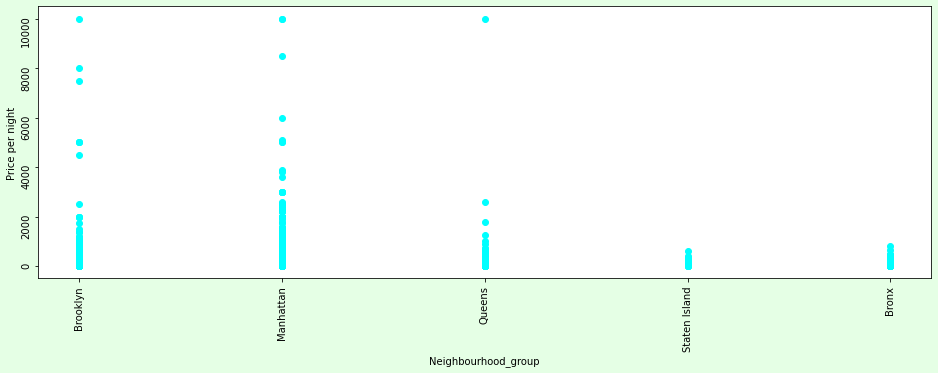

In [48]:
plt.figure(figsize=(16,5), facecolor=(0, 1, 0, .1))
plt.scatter(data3.neighbourhood_group,data3['price'],color="cyan",marker = "o")
plt.xlabel("Neighbourhood_group")
plt.ylabel("Price per night")
plt.xticks(rotation ="90")
plt.yticks(rotation="90")#for rotating vertically
plt.show()

In [ ]:
#Draw 2 plots on top of each other in the same figure
plt.figure(figsize=(16,5), facecolor=(0, 1, 0, .1))

plt.plot(data3.neighbourhood_group,data3['price'],label="Death Counts",color="blue")
plt.plot(data3.neighbourhood_group,data3['number_of_reviews'],label="Recovered Counts",color="red")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()